<a href="https://colab.research.google.com/github/jwalor/mineriaweb/blob/main/TOPICOS_KMEANS_TF_IDF_PUCP_2020_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install WordCloud

In [ ]:
!pip install unidecode

     |████████████████████████████████| 245kB 2.8MB/s 


# Importar librerías

In [ ]:
#importando modulos
import pandas as pd
import numpy as np
import re
import unidecode
import math
import collections
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from wordcloud import WordCloud, ImageColorGenerator
import os

import matplotlib.pyplot as plt

## Exportar Archivo comentarios limpios

In [ ]:
#Exportando los comentarios limpios en csv
BaseLimpia = pd.read_csv("BaseLimpia.csv")

In [ ]:
BaseLimpia.head()

,calificacion,comentarios
0,4,atendieron rapido amablemente
1,5,atencion personal excelente
2,4,atendieron rapido asesoraron bien
3,5,atendieron mucha cortesia senorita amable ayud...
4,4,atendieron prontitud eficacia


## Top100 y Cantidad Comentarios Limpios

In [ ]:
#Numero de comentarios limpios
c = BaseLimpia
c = c['comentarios']
c.replace('', np.nan, inplace=True)
c = c.dropna()
cant_com_limpios = len(c)
#print(cant_com_limpios)

In [ ]:
cant_com_limpios

85992

In [ ]:
c.to_csv("ComsLim.csv",index = False)

In [ ]:
limpieza=c.values.tolist()
len(c)

85992

In [ ]:
lista_comentarios = limpieza
##########lista_comentarios.remove('')
#Cantidad Total comentarios Base
lista_palabras= str(limpieza)
lista_palabras = re.sub('[^A-Za-z0-9]+', ' ', lista_palabras)
lista_palabras = lista_palabras.split()
#cantidad_palabras = len(lista_palabras)
cantidad = len(lista_comentarios)
#print(cantidad)

In [ ]:
len(lista_palabras)

544488

## TF

In [ ]:
frec_palabras_unicas = collections.Counter(lista_palabras)
cantidad_palabra_documento = []
frec_palabras_unicas.pop('',None)

for comentario in c:
    #print(comentario)
    cantidad_palabra_documento.append(collections.Counter(comentario.split()))

#Frecuencia de palabras por documento
print(cantidad_palabra_documento[1:10])

[Counter({'atencion': 1, 'personal': 1, 'excelente': 1}), Counter({'atendieron': 1, 'rapido': 1, 'asesoraron': 1, 'bien': 1}), Counter({'atendieron': 1, 'mucha': 1, 'cortesia': 1, 'senorita': 1, 'amable': 1, 'ayudo': 1, 'tramites': 1, 'realizaba': 1}), Counter({'atendieron': 1, 'prontitud': 1, 'eficacia': 1}), Counter({'atencion': 1, 'buena': 1, 'respondieron': 1, 'consultas': 1}), Counter({'buena': 1, 'atencion': 1}), Counter({'buena': 1, 'atencion': 1, 'funcionaria': 1, 'consideraron': 1, 'clientes': 1, 'otorgarnos': 1, 'creditos': 1, 'bcp': 1, 'asi': 1, 'mismo': 1, 'rapido': 1, 'efectiva': 1, 'visita': 1, 'efectuamos': 1}), Counter({'atencion': 1, 'ana': 1, 'bustamante': 1, 'funcionarios': 1, 'no': 1, 'atienden': 1, 'bien': 1}), Counter({'pude': 1, 'hacer': 1, 'justo': 1, 'requeria': 1, 'mas': 1})]


In [ ]:
frec_palabras_unicas

In [ ]:
!conda install --upgrade pandas

/bin/bash: conda: command not found


In [ ]:
#Top 100 palabras
conteo_unicas = pd.DataFrame.from_dict(frec_palabras_unicas, orient = 'index')

In [ ]:
conteo_unicas.rename(columns={0:'frecuencia'}, inplace=True)

In [ ]:
conteo_unicas.head()

,frecuencia
atendieron,9707
rapido,7202
amablemente,1024
atencion,41677
personal,4468


In [ ]:
conteo_unicas = conteo_unicas.sort_values('frecuencia',ascending=False)
top_100 = conteo_unicas[0:100]
print(top_100)

             frecuencia
atencion          41677
buena             15345
no                15251
rapida            12944
atendieron         9707
...                 ...
ventanillas         789
operaciones         786
asesor              785
satisfecho          776
consulta            768

[100 rows x 1 columns]


In [ ]:
top_100.frecuencia[top_100.index[0]]

41677

In [ ]:
cantidad

85992

## IDF

In [ ]:
idf = dict()
for indice in range(0,100):
    palabra = top_100.index[indice]
    freq = top_100.frecuencia[str(palabra)]
    cociente = cantidad / freq
    operacion = math.log((cociente),2)
    idf[palabra] = operacion

In [ ]:
idf['consulta']

6.806952328210737

## TF-IDF

In [ ]:
#TF-IDF
frec_palabras_unicas = collections.Counter(lista_palabras)
cantidad_palabra_documento = []
frec_palabras_unicas.pop('',None)

lista_tfidf=[]
for comentario in c:
    vec_tf = np.zeros(100, dtype=float)
    diccionario =  collections.Counter(comentario.split())
    for w in diccionario.keys():
            if w in idf:
                val = idf[w] * diccionario[w] 
            try:
                idx = top_100.index.get_loc(w)
                vec_tf[idx] = val
            except:
                continue
            
    lista_tfidf.append(vec_tf)

In [ ]:
top_100.index.get_loc("atencion")

0

In [ ]:
vec_tf

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 4.26650136,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 5.05429293,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 5.31777337, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
len(lista_tfidf)

85992

# Clusterización kmeans con vectores tf-idf

In [ ]:
calificacion_limpia = BaseLimpia.dropna()['calificacion']

In [ ]:
nueva_base = pd.DataFrame({"Vector_comentario":lista_tfidf,
            "calificacion":calificacion_limpia} ) 
nueva_base = nueva_base.reset_index(drop = True)

In [ ]:
nueva_base.head()

,Vector_comentario,calificacion
0,"[0.0, 0.0, 0.0, 0.0, 3.1471050523187105, 0.0, ...",4
1,"[1.044951016317158, 0.0, 0.0, 0.0, 0.0, 0.0, 0...",5
2,"[0.0, 0.0, 0.0, 0.0, 3.1471050523187105, 0.0, ...",4
3,"[0.0, 0.0, 0.0, 0.0, 3.1471050523187105, 3.466...",5
4,"[0.0, 0.0, 0.0, 0.0, 3.1471050523187105, 0.0, ...",4


In [ ]:
X1 = np.asarray(lista_tfidf)

## Normalizacion de vectores tf-idf para kmeans

In [ ]:
#Nornalizando vectores
scaler = StandardScaler()  
scaler.fit(X1)
X1 = scaler.transform(X1)

In [ ]:
X1

array([[-0.905565  , -0.45805793, -0.30456094, ..., -0.0934927 ,
        -0.09469083, -0.08657414],
       [ 0.96288392, -0.45805793, -0.30456094, ..., -0.0934927 ,
        -0.09469083, -0.08657414],
       [-0.905565  , -0.45805793, -0.30456094, ..., -0.0934927 ,
        -0.09469083, -0.08657414],
       ...,
       [-0.905565  , -0.45805793, -0.30456094, ..., -0.0934927 ,
        -0.09469083, -0.08657414],
       [-0.905565  ,  2.10885753, -0.30456094, ..., -0.0934927 ,
        -0.09469083, -0.08657414],
       [-0.905565  , -0.45805793, -0.30456094, ..., -0.0934927 ,
        -0.09469083, -0.08657414]])

## Funciones modelo KMeans

In [ ]:
#Creando modelo clusters asignados
def CrearKMeans(k,lista_vect):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(lista_vect)
    lb_km = kmeans.labels_
    return lb_km, kmeans

In [ ]:
labels , modelo = CrearKMeans(5,X1)

In [ ]:
labels[labels==3].shape

(70370,)

In [ ]:
#Contar elementos por cluster del modelo
def e_x_cluster(lb_km):
    e_clus = collections.Counter(lb_km)
    cant_x_cl = pd.DataFrame.from_dict(e_clus, orient = 'index')
    cant_x_cl.rename(columns={0:'Cantidad_elementos'}, inplace=True)
    cant_x_cl = cant_x_cl.sort_index(axis=0)
    return cant_x_cl

cant_x_cluster = e_x_cluster(labels)

In [ ]:
cant_x_cluster

,Cantidad_elementos
0,913
1,1099
2,7936
3,70370
4,5674


In [ ]:
#Comentario y cluster asignado
coms_cn_clus = pd.DataFrame({"comentarios":c,
            "cluster": labels}) 
coms_cn_clus.head()
#Exportar comentarios por cluster del modelo
#coms_cn_clus.to_csv("comentarios_con_cluster.csv",index = False)

,comentarios,cluster
0,atendieron rapido amablemente,3
1,atencion personal excelente,3
2,atendieron rapido asesoraron bien,3
3,atendieron mucha cortesia senorita amable ayud...,3
4,atendieron prontitud eficacia,3


In [ ]:
#Frecuencia de palabras por cluster
def cant_palabras_clust(vec_etiqueta,i):
    vec_coments = vec_etiqueta[vec_etiqueta['cluster'] == i]
    coms_k_i = vec_coments['comentarios'].tolist()
    coms_k_i = str(coms_k_i)
    coms_k_i = re.sub('[^A-Za-z0-9]+', ' ', coms_k_i)
    pal_k_i = collections.Counter(coms_k_i.split())
    df_pal_k_i = pd.DataFrame.from_dict(pal_k_i, orient = 'index')
    df_pal_k_i.rename(columns={0:'freq_pal'}, inplace=True)
    df_pal_k_i = df_pal_k_i.sort_values('freq_pal',ascending=False)
    
    return df_pal_k_i 


In [ ]:
len(set(labels))

5

In [ ]:
def cont_x_clus(x_clus):
    palabras_cl = []
    cnt_labels = len(set(labels))
    for i in range (cnt_labels):
        palabras_cl.append(cant_palabras_clust(x_clus,i))
    return palabras_cl

In [ ]:
palabrasx_cls =cont_x_clus(coms_cn_clus)

In [ ]:
len(palabrasx_cls)

5

In [ ]:
palabrasx_cls[0].head()

,freq_pal
no,2548
tarjeta,961
si,685
cuenta,657
soles,572


In [ ]:
def word_cloud(pl_x_cl,i):
    dict_p=pl_x_cl[i].to_dict()
    wordcloud = WordCloud()
    wordcloud.generate_from_frequencies(frequencies=dict_p['freq_pal'])
    plt.figure()
    plt.title('Cluster ['+str(i)+"] : "+pl_x_cl[i].index[0]+" "+pl_x_cl[i].index[1]+" "+pl_x_cl[i].index[2]+" "+pl_x_cl[i].index[3]+" "+pl_x_cl[i].index[4]+" "+pl_x_cl[i].index[5])
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
    return wordcloud

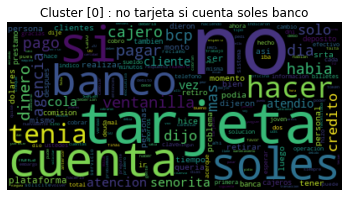

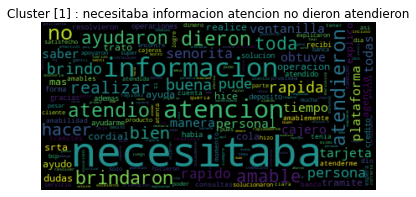

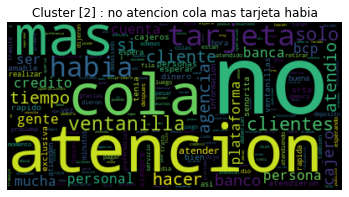

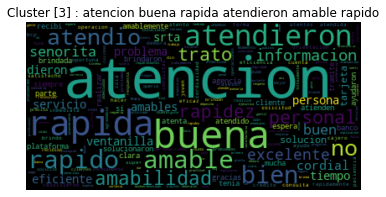

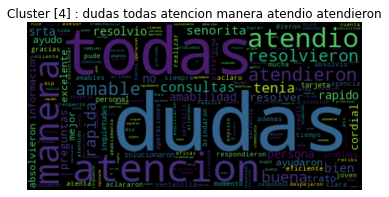

In [ ]:
nubes = []
cnt_labels = len(set(labels))
for i in range(0,cnt_labels):
    try:
        nubes.append(word_cloud(palabrasx_cls,i))
    except:
        continue 